In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
from IPython.display import clear_output
from src import spotify, dp, utils, DB

db = DB()

In [4]:
# 1. Get Token
token = spotify.get_token()

# 2. Select Music
sel_tracks = spotify.search_tracks(token)
mail_box_id = str(db.regist_mail_box(sel_tracks).inserted_id)

# 3. Data Processing
genres = spotify.get_genres(token, sel_tracks)
features = spotify.get_features(token, sel_tracks)
db.observe_seed_zone(features)

recos = spotify.get_recommend(sel_tracks, features, genres, token)
reco_features = spotify.get_features(token, recos)

계속하시려면 next, 종료는 exit를 입력해주세요.exit


### sel tracks (우체통)
- 사용자의 음악 성향

In [5]:
sel_tracks.head()

,id,name,artists,artists_name,image
0,3Vv1HIcXcNsUYQJfKdAFU0,OSAKA,15KDb2KpZRvX1updtyinK1,ELO,https://i.scdn.co/image/ab67616d0000b2736a0ab6...
1,411ji7Vv6o6LYpL8jf53Sf,Citrus,7IWshUcKfJyDWrbiF2XT8J,Kid Milli,https://i.scdn.co/image/ab67616d0000b2737c8562...
2,2V7xR0xTLX7p1g1L6CteYO,What A Mess,2MtHuR0W2idZdF7x4wddqq,GIRIBOY,https://i.scdn.co/image/ab67616d0000b273928018...


In [6]:
features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,3Vv1HIcXcNsUYQJfKdAFU0,0.772,0.525,7,-4.924,0.0430,0.3740,0.00000,0.362,0.336,93.034
1,411ji7Vv6o6LYpL8jf53Sf,0.668,0.800,0,-6.710,0.0263,0.0642,0.00001,0.136,0.876,119.979
2,2V7xR0xTLX7p1g1L6CteYO,0.792,0.533,9,-5.138,0.0954,0.1160,0.00000,0.120,0.632,80.011


### recos
- 사용자가 등록한 음악으로 Spotify API 에서 추천된 음악

In [7]:
recos.head()

,id,name,artists,artists_name,image
0,66UcQu5LBo2A7AC0A5r0lI,Wi Ing Wi Ing,57okaLdCtv3nVBSn5otJkp,HYUKOH,https://i.scdn.co/image/ab67616d0000b2731ca37e...
2,6KMoKU9mRNthObqYAMrXnD,Jus Lyke Compton,0b2XeWDPeBiLeskT6RFqMb,DJ Quik,https://i.scdn.co/image/ab67616d0000b2736ac1c8...
3,2yPFwTJ1tUSLH0D28u3153,For the gone(with ELLE KOREA),"4WnO2VmlwdTX77ANsThWLQ,5Fa7oN67rqbrgxbRVux7F4,...","CODE KUNST,CHOI JUNG HOON of JANNABI,Simon Dom...",https://i.scdn.co/image/ab67616d0000b273f94eb4...
4,6SG8lh7fWQ2bahP5WBYePn,We don't talk together (Prod. by SUGA),5dCvSnVduaFleCnyy98JMo,HEIZE,https://i.scdn.co/image/ab67616d0000b27356c426...
5,3NGqVukEbiECo3YgZYzp36,a fence,5a8EJtOEbUJDF4RX3mKK02,Woo,https://i.scdn.co/image/ab67616d0000b273ef7e1e...


In [8]:
reco_features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,66UcQu5LBo2A7AC0A5r0lI,0.700,0.696,7,-5.356,0.0525,0.2620,0.000000,0.107,0.293,124.825
1,6KMoKU9mRNthObqYAMrXnD,0.770,0.812,7,-5.247,0.1460,0.0205,0.000000,0.461,0.652,94.661
2,2yPFwTJ1tUSLH0D28u3153,0.736,0.700,7,-4.774,0.0448,0.1460,0.000000,0.317,0.415,132.034
3,6SG8lh7fWQ2bahP5WBYePn,0.629,0.736,7,-4.672,0.0401,0.0390,0.000000,0.333,0.308,97.883
4,3NGqVukEbiECo3YgZYzp36,0.794,0.547,7,-4.366,0.0633,0.7290,0.000027,0.374,0.729,85.007


In [9]:
recos

,id,name,artists,artists_name,image
0,66UcQu5LBo2A7AC0A5r0lI,Wi Ing Wi Ing,57okaLdCtv3nVBSn5otJkp,HYUKOH,https://i.scdn.co/image/ab67616d0000b2731ca37e...
2,6KMoKU9mRNthObqYAMrXnD,Jus Lyke Compton,0b2XeWDPeBiLeskT6RFqMb,DJ Quik,https://i.scdn.co/image/ab67616d0000b2736ac1c8...
3,2yPFwTJ1tUSLH0D28u3153,For the gone(with ELLE KOREA),"4WnO2VmlwdTX77ANsThWLQ,5Fa7oN67rqbrgxbRVux7F4,...","CODE KUNST,CHOI JUNG HOON of JANNABI,Simon Dom...",https://i.scdn.co/image/ab67616d0000b273f94eb4...
4,6SG8lh7fWQ2bahP5WBYePn,We don't talk together (Prod. by SUGA),5dCvSnVduaFleCnyy98JMo,HEIZE,https://i.scdn.co/image/ab67616d0000b27356c426...
5,3NGqVukEbiECo3YgZYzp36,a fence,5a8EJtOEbUJDF4RX3mKK02,Woo,https://i.scdn.co/image/ab67616d0000b273ef7e1e...
...,...,...,...,...,...
295,1VrpAZL277l0gnTBhSd3TH,Sooljalee,2MtHuR0W2idZdF7x4wddqq,GIRIBOY,https://i.scdn.co/image/ab67616d0000b273002ac8...
296,4Jpsou7XWCNG2cgeFZBSvL,Kitty (Feat. MIYEON ((G)I-DLE),"7IWshUcKfJyDWrbiF2XT8J,72b1XZ6SmDRgHEOB7ypw9z","Kid Milli,dress",https://i.scdn.co/image/ab67616d0000b273337faf...
297,6BH7P5RyXzRnatUsmeVWEA,Daisy Remix (feat. Paul Blanco & ASH ISLAND),6N7b9mUVwn885jI7RRg8no,Mirani,https://i.scdn.co/image/ab67616d0000b27353fce6...
298,1Y8tCOCqwav6RBvfNjYphx,FRIENDS,"25wMXkplvEHJpJHX8A6Ved,5o615XColiSVMPDWlslKSk","lIlBOI,Wonstein",https://i.scdn.co/image/ab67616d0000b27381db0f...


### norm data
- 정규화

In [329]:
norm_features = dp.make_norm(features, reco_features)

norm_features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,3Vv1HIcXcNsUYQJfKdAFU0,0.714065,0.377025,0.636364,0.708635,0.046895,0.446066,0.000000,0.520958,0.296055,0.209236
1,411ji7Vv6o6LYpL8jf53Sf,0.553323,0.782032,0.000000,0.554723,0.004563,0.075421,0.000037,0.155203,0.892806,0.454072
2,2V7xR0xTLX7p1g1L6CteYO,0.744977,0.388807,0.818182,0.690193,0.179721,0.137395,0.000000,0.129309,0.623163,0.090902
3,66UcQu5LBo2A7AC0A5r0lI,0.602782,0.628866,0.636364,0.671406,0.070976,0.312069,0.000000,0.108270,0.248536,0.498105
4,6KMoKU9mRNthObqYAMrXnD,0.710974,0.799705,0.636364,0.680800,0.307985,0.023138,0.000000,0.681178,0.645265,0.224019


### 추천된 데이터들의 audio features 시각화

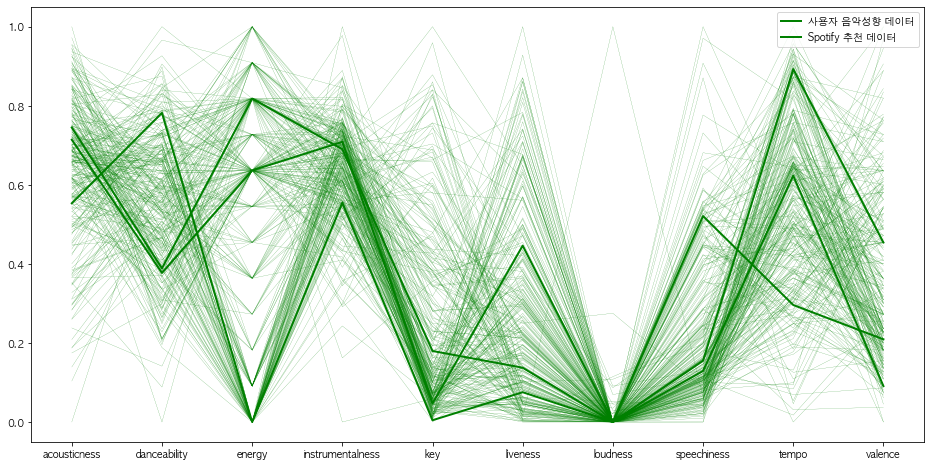

In [308]:
utils.visual_norm_data(sel_tracks, norm_features)

### KMeans ++ Researching

In [309]:
from src.utils import KMeans2
from sklearn.metrics.pairwise import euclidean_distances as euc
import numpy as np
import math as mt
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [468]:
def run(norm_features, sel_tracks):
    _norm_features = norm_features.copy()
    sel_features = norm_features.set_index("id").loc[sel_tracks['id']].reset_index("id").copy()
    
    ecv_mem = np.array([])
    reco_mem = np.array([])
    while True:
        kmeans2 = KMeans2(_norm_features)
        kmeans2.fit()
        
        ecv_mem = np.append(ecv_mem, kmeans2.ecv)
        
        reco_ids = dp.music_filtering2(sel_tracks, _norm_features, kmeans2)
        _reco_mem = np.append(reco_mem, reco_ids)
        
        if _reco_mem.size >= 100:
            _norm_features = _norm_features.set_index("id").loc[reco_ids].reset_index("id")
        elif _reco_mem.size < 30:
            _norm_features = norm_features.set_index("id").drop(_reco_mem).reset_index("id").copy()
            reco_mem = _reco_mem.copy()
        else:
            reco_mem = _reco_mem.copy()
            break
            
        _norm_features = pd.concat([_norm_features, sel_features])
        
    return reco_mem

In [469]:
reco_mem = run(norm_features, sel_tracks)

ECV 44%
ECV 50%
ECV 51%
ECV 52%
ECV 52%
ECV 53%
ECV 53%
ECV 53%
ECV 53%
ECV 53%
ECV 53%
ECV 53%
ECV 55%
ECV 58%
ECV 58%
ECV 58%
ECV 58%
ECV 58%
ECV 58%
ECV 58%


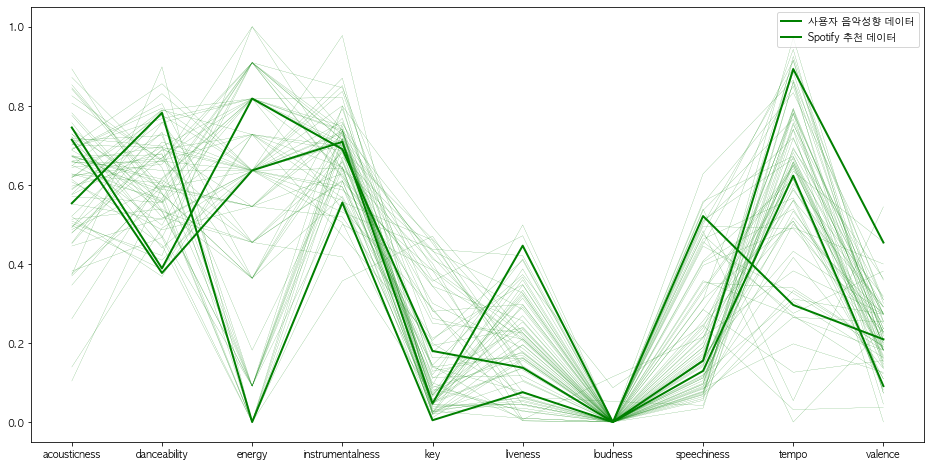

In [470]:
sel_features = norm_features.set_index("id").loc[sel_tracks['id'].values].reset_index("id")
filter_music = norm_features.set_index("id").loc[reco_mem].reset_index("id")

filter_music = pd.concat([sel_features, filter_music])

utils.visual_norm_data(sel_tracks, filter_music)

In [312]:
reco_ids = dp.music_filtering2(sel_tracks, norm_features, kmeans2)
_norm_features = norm_features.copy()

In [313]:
if reco_ids.size > 50:
    norm_features = norm_features.set_index("id").loc[reco_ids].reset_index("id")
    sel_features = _norm_features.set_index("id").loc[sel_tracks['id']].reset_index("id")

norm_features = pd.concat([norm_features, sel_features])
norm_features

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,4Sv7Fo4bSpK0tM1WBspz4J,0.687790,0.391753,0.181818,0.694502,0.058555,0.002106,0.000019,0.103415,0.344679,0.490255
1,1dA1tlzwcJ3YDYsSul1m06,0.619784,0.678940,0.090909,0.703895,0.048416,0.320444,0.000009,0.111507,0.592220,0.209063
2,1sxLfXamWDo4F9CSu9lb9F,0.718702,0.698085,0.000000,0.717253,0.093283,0.498708,0.000000,0.078006,0.778981,0.272623
3,70BDNj3bSHhQkN5wm4L0oB,0.656878,0.730486,0.090909,0.704154,0.259823,0.053168,0.000000,0.127691,0.386673,0.272178
4,6YuJzx4yiTMhia4aM1M9kU,0.850077,0.393225,0.000000,0.656325,0.100887,0.087146,0.000000,0.218320,0.415405,0.453727
...,...,...,...,...,...,...,...,...,...,...,...
99,39hXM0fPqzUzGCPECajajT,0.842349,0.577320,0.363636,0.792399,0.139163,0.168501,0.000004,0.173005,0.793347,0.236095
100,6BH7P5RyXzRnatUsmeVWEA,0.701700,0.693667,0.545455,0.726129,0.067681,0.313266,0.000000,0.117980,0.782296,0.272987
0,3Vv1HIcXcNsUYQJfKdAFU0,0.714065,0.377025,0.636364,0.708635,0.046895,0.446066,0.000000,0.520958,0.296055,0.209236
1,411ji7Vv6o6LYpL8jf53Sf,0.553323,0.782032,0.000000,0.554723,0.004563,0.075421,0.000037,0.155203,0.892806,0.454072


ECV 51%
ECV 56%
ECV 57%
ECV 57%
ECV 57%
ECV 58%
ECV 58%
ECV 58%
ECV 58%


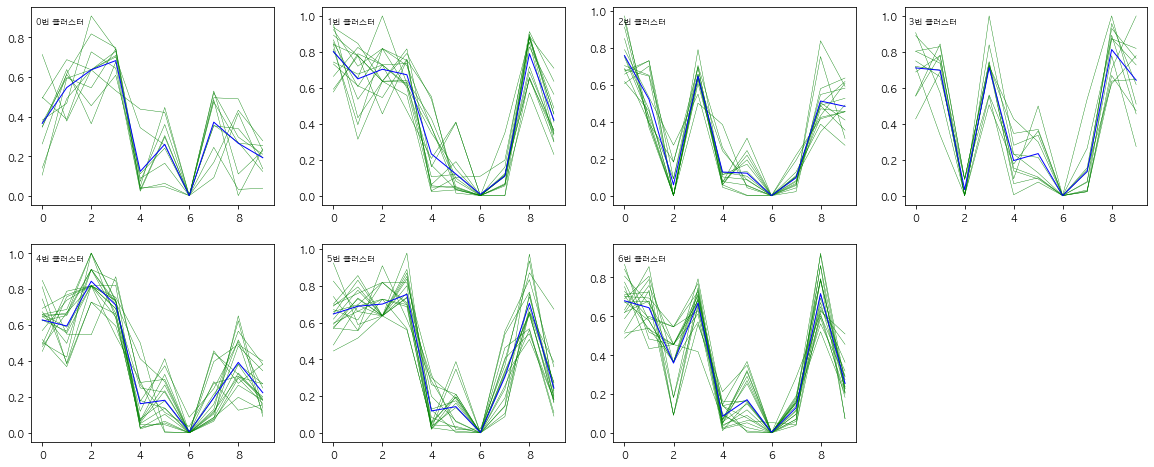

In [315]:
kmeans2 = KMeans2(norm_features)
kmeans2.fit()
kmeans2.cluster_plot()

In [325]:
norm_features = _norm_features.copy()

In [326]:
reco_mem = np.array([])

reco_ids = dp.music_filtering2(sel_tracks, norm_features, kmeans2)
_norm_features = norm_features.copy()

In [327]:
if reco_ids.size > 50:
    norm_features = norm_features.set_index("id").loc[reco_ids].reset_index("id")
    sel_features = _norm_features.set_index("id").loc[sel_tracks['id']].reset_index("id")
elif reco_ids.size < 40:
    reco_mem
    norm_features = norm_features.set_index("id").drop(reco_ids).reset_index("id")
    sel_features = _norm_features.set_index("id").loc[sel_tracks['id']].reset_index("id")

norm_features = pd.concat([norm_features, sel_features])
# norm_features

In [328]:
norm_features

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,4Sv7Fo4bSpK0tM1WBspz4J,0.687790,0.391753,0.181818,0.694502,0.058555,0.002106,0.000019,0.103415,0.344679,0.490255
1,1dA1tlzwcJ3YDYsSul1m06,0.619784,0.678940,0.090909,0.703895,0.048416,0.320444,0.000009,0.111507,0.592220,0.209063
2,70BDNj3bSHhQkN5wm4L0oB,0.656878,0.730486,0.090909,0.704154,0.259823,0.053168,0.000000,0.127691,0.386673,0.272178
3,6YuJzx4yiTMhia4aM1M9kU,0.850077,0.393225,0.000000,0.656325,0.100887,0.087146,0.000000,0.218320,0.415405,0.453727
4,4q9JLlC3HIhN4CDC6KlpYK,0.972179,0.368189,0.000000,0.623578,0.242079,0.084155,0.000000,0.041592,0.837551,0.591052
...,...,...,...,...,...,...,...,...,...,...,...
66,411ji7Vv6o6LYpL8jf53Sf,0.553323,0.782032,0.000000,0.554723,0.004563,0.075421,0.000037,0.155203,0.892806,0.454072
67,2V7xR0xTLX7p1g1L6CteYO,0.744977,0.388807,0.818182,0.690193,0.179721,0.137395,0.000000,0.129309,0.623163,0.090902
0,3Vv1HIcXcNsUYQJfKdAFU0,0.714065,0.377025,0.636364,0.708635,0.046895,0.446066,0.000000,0.520958,0.296055,0.209236
1,411ji7Vv6o6LYpL8jf53Sf,0.553323,0.782032,0.000000,0.554723,0.004563,0.075421,0.000037,0.155203,0.892806,0.454072


### KMeans

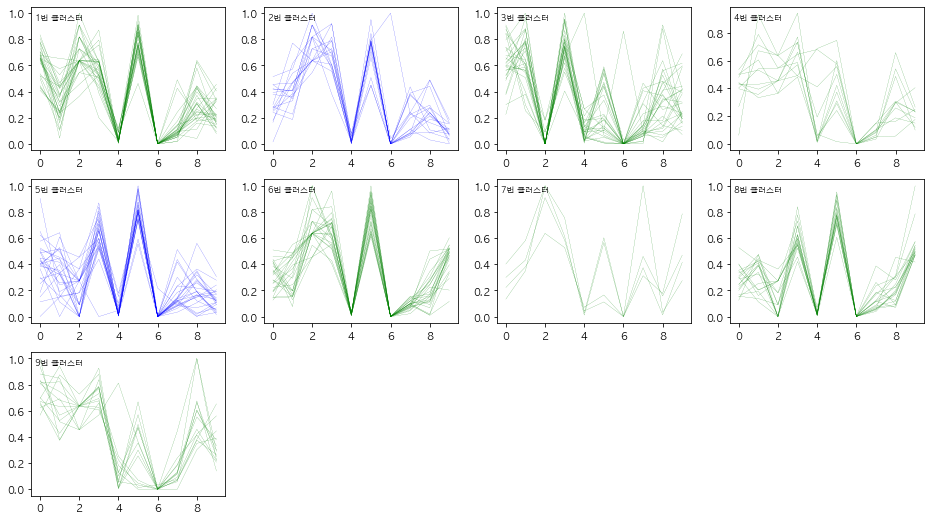

In [12]:
filter_music_list, kmeans = utils.reco_KMeans(norm_features, sel_tracks)

utils.visual_cluster_data(sel_tracks, kmeans)

In [13]:
_filtering_music_list = dp.music_filtering(sel_tracks, kmeans)

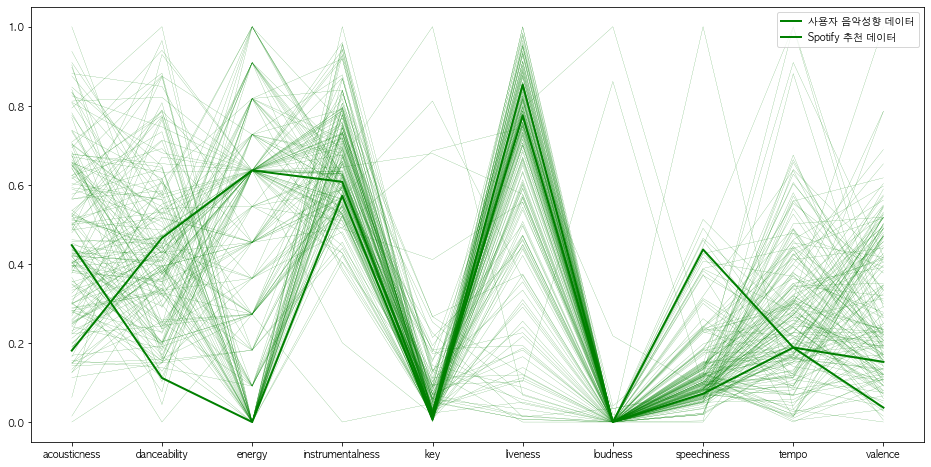

In [14]:
utils.visual_norm_data(sel_tracks, norm_features)

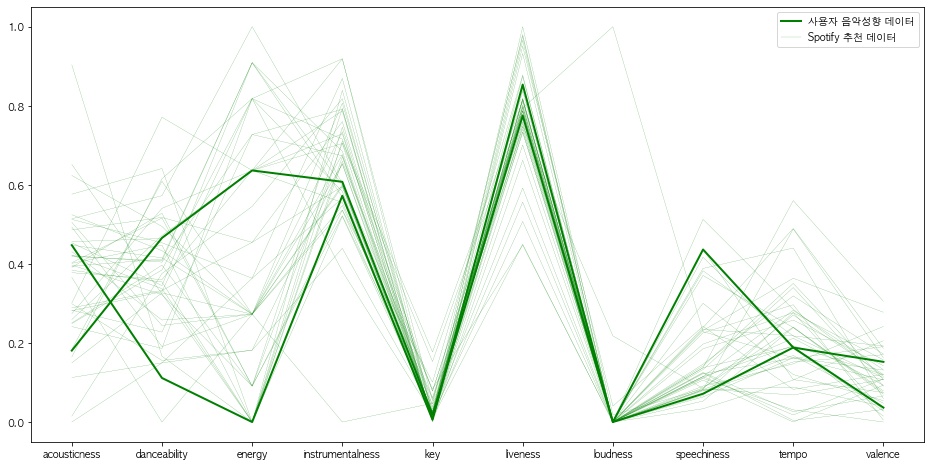

,id,name,artists,artists_name,image
0,2RttW7RAu5nOAfq6YFvApB,Happier,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,https://i.scdn.co/image/ab67616d0000b273ba5db4...
4,1cayXr914ctuYeJkv3CPUR,Rest,6dhfy4ByARPJdPtMyrUYJK,Yerin Baek,https://i.scdn.co/image/ab67616d0000b273654022...
11,1e5qALs3pDrv203jX0XWAC,Autumn Breeze,0hRHbwZ0xSwfVHl4FTv7jq,Gummy,https://i.scdn.co/image/ab67616d0000b27339f1cc...
13,3P3UA61WRQqwCXaoFOTENd,Through the Night,3HqSLMAZ3g3d5poNaI7GOU,IU,https://i.scdn.co/image/ab67616d0000b273c06f0e...
14,0jdny0dhgjUwoIp5GkqEaA,Praying,6LqNN22kT3074XbTVUrhzX,Kesha,https://i.scdn.co/image/ab67616d0000b27355de63...


In [15]:
filter_music = norm_features.set_index("id").loc[_filtering_music_list].reset_index()
reco_musics = [_ in _filtering_music_list for _ in recos['id']]

utils.visual_norm_data(sel_tracks, filter_music)
recos[reco_musics].head()

In [20]:
res = db.regist_mail(mail_box_id, recos[reco_musics])
mail_id = res.inserted_id
print("우체통({})에\n추천 플레이리스트 MuLetter({})가 등록되었습니다.".format(
    mail_box_id
    ,str(mail_id)))

우체통(624be96e88f0095783fb9d9d)에
추천 플레이리스트 MuLetter(624be99b88f0095783fb9d9e)가 등록되었습니다.


In [21]:
genres

,artists,genres
0,3HqSLMAZ3g3d5poNaI7GOU,"k-pop,pop"
1,6zn0ihyAApAYV51zpXxdEp,"k-pop,pop"


In [23]:
recos[reco_musics].head()

,id,name,artists,artists_name,image
0,2RttW7RAu5nOAfq6YFvApB,Happier,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,https://i.scdn.co/image/ab67616d0000b273ba5db4...
4,1cayXr914ctuYeJkv3CPUR,Rest,6dhfy4ByARPJdPtMyrUYJK,Yerin Baek,https://i.scdn.co/image/ab67616d0000b273654022...
11,1e5qALs3pDrv203jX0XWAC,Autumn Breeze,0hRHbwZ0xSwfVHl4FTv7jq,Gummy,https://i.scdn.co/image/ab67616d0000b27339f1cc...
13,3P3UA61WRQqwCXaoFOTENd,Through the Night,3HqSLMAZ3g3d5poNaI7GOU,IU,https://i.scdn.co/image/ab67616d0000b273c06f0e...
14,0jdny0dhgjUwoIp5GkqEaA,Praying,6LqNN22kT3074XbTVUrhzX,Kesha,https://i.scdn.co/image/ab67616d0000b27355de63...


In [24]:
spotify.get_genres(token,recos[reco_musics]).head()

,artists,genres
0,6eUKZXaKkcviH0Ku9w2n3V,"pop,k-pop"
1,6dhfy4ByARPJdPtMyrUYJK,"k-pop,pop"
2,0hRHbwZ0xSwfVHl4FTv7jq,"k-pop,pop"
3,3HqSLMAZ3g3d5poNaI7GOU,"k-pop,pop"
4,6LqNN22kT3074XbTVUrhzX,pop
